# DIGIT RECOGNITION GUIDE (CNN, AUGMENTATION, TUNING) [99.5%]

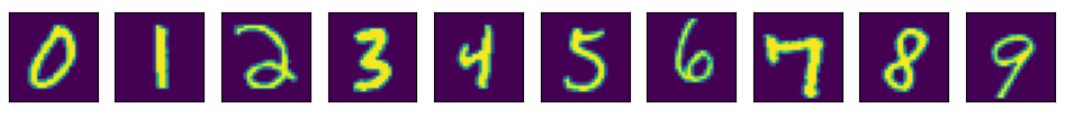

### by Thomas Mason

#### Hello and welcome to my notebook, I hope you find it useful and learn something from it. I spent some time working on this notebook so please upvote if you find it helpful and leave a comment, I would love to hear your feedback. Thank you! 😄

* **1. Introduction** 
 * 1.1 Abstract
 * 1.2 Libraries and GPU configuration
* **2. Data preparation and pre-processing**
 * 2.1 Loading data
 * 2.2 Checking for missing values
 * 2.3 Data and target class visualizations
 * 2.4 Creating training and validation sets
 * 2.5 Pre-processing pipelines
 * 2.6 Custom f1, recall and precision metrics
* **3. Building network and training**
 * 3.1 Building network
 * 3.2 Training network
 * 3.3 Validation results
 * 3.4 Review of incorrectly classified examples
 * 3.5 Visualizing filters and feature-maps
* **4. Data augmentation**
 * 4.1 Creating an ImageDataGenerator
 * 4.2 Augmented images visualized
 * 4.3 Training network on augmented data
 * 4.4 Validation results on augmented data
* **5. Hyper-parameter tuning**
 * 5.1 Building hyper-parameter model
 * 5.2 Hyper-parameter search (using HyperBand)
 * 5.3 Hyper-parameter results
* **6. Ensembling**
 * 6.1 Ensembling top models from hyper-parameter tuning
 * 6.2 Voting classifier function and results
 * 6.3 Ensembling on best model
* **7. Conclusion**
 * 7.1 Results summary

# 1. Introduction

### 1.1 Abstract

#### *This notebook will explore the use of a CNN architecture using a LeNet design on the MNIST dataset. We will also use multiple techniques including data augmentation, hyper-parameter tuning with keras tuner and ensembling to try to further optimize and improve network performance.*



### 1.2 Libraries and GPU configuration

In [3]:
!pip install tensorflow seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 51.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 154.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 126.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 60.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 121.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 127.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 55.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.0 MB/s eta 0

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

2023-02-20 10:45:33.698775: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 10:45:34.844485: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-20 10:45:34.844535: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-20 10:45:36.314289: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

> <div class="alert alert-block alert-info">
    <b>Checking GPU is configured correctly for tensorflow.</b></div>

In [ ]:
tf.config.list_physical_devices()

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


NameError: name 'tf' is not defined

> <div class="alert alert-block alert-info">
<b>GPU is successfully configured. I will be using an Nvidia RTX 3090, which significantly increased training speeds by around 8x comparred to CPU.</b></div>


In [5]:
file_dir = r'../input'

> <div class="alert alert-block alert-info">
    <b>Set your file directory here.</b></div>


# 2. Data preparation and pre-processing

### 2.1 Loading data

In [6]:
df_train = pd.read_csv(file_dir+r'/train.csv')
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test = pd.read_csv(file_dir+r'/test.csv')
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.2 Checking for missing values

In [8]:
df_train.isna().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [9]:
df_test.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 42000 entries, 0 to 41999

Columns: 785 entries, label to pixel783

dtypes: int64(785)

memory usage: 251.5 MB


In [8]:
X = df_train.iloc[:,1:]
y = df_train.iloc[:, 0]
print(X.shape, y.shape)

(42000, 784) (42000,)


> <div class="alert alert-block alert-info">
    <b>No missing data, let's continue.</b></div>


### 2.3 Data and target class visualizations

<AxesSubplot: >

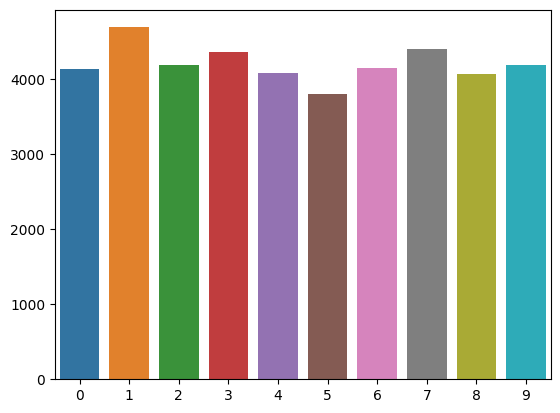

In [12]:
sns.barplot(x=y.value_counts().index, y=y.value_counts().values)

> <div class="alert alert-block alert-info">
    <b>As you can see, there is a fairly even class distribution.</b></div>

(28, 28)


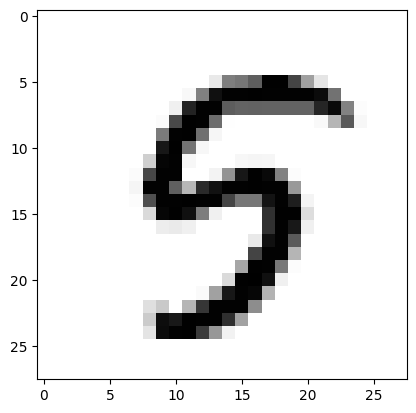

In [13]:
z = np.reshape(X.iloc[8].values, (28,28))
print(z.shape)
plt.imshow(z, cmap='Greys')

> <div class="alert alert-block alert-info">
    <b>Here is an example of one of the digits. It is a 28 x 28 black and white image.</b></div>

### 2.4 Creating training and validation sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=15)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(37800, 784) (4200, 784) (37800,) (4200,)


> <div class="alert alert-block alert-info">
<b>We now need to split the training data into two sets; training and validation. We will train on 90% of the data, and use the remaining 10% to evaluate the model during training.</b></div>

### 2.5 Pre-processing pipelines

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

In [13]:
class ReshapeFunc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.reshape((-1,28,28,1))
        return X

> <div class="alert alert-block alert-info">
<b>Custom transformer was created to add a channel dimension to the input (X) data. As the image is black and white we only have 1 channel. In the case of a coloured image we would require 3 channels (red blue green).</b></div>

In [14]:
features_pipeline = Pipeline(steps=[
    ('Normalize', MinMaxScaler()),
    ('Reshape', ReshapeFunc())
])

> <div class="alert alert-block alert-info">
    <b>Feature pipeline. Data is scaled between 0 and 1 and then reshaped into input format.</b></div>

In [15]:
X_train = features_pipeline.fit_transform(X_train)

In [16]:
from sklearn.preprocessing import OneHotEncoder
target_pipeline = Pipeline(steps=[
    ('OneHot', OneHotEncoder())
])

> <div class="alert alert-block alert-info">
<b>Target pipeline. One hot encoding is used, as we will be using a softmax activation function in the output node.</b></div>

In [17]:
y_train = target_pipeline.fit_transform(y_train.values.reshape(-1,1))

In [18]:
y_train = y_train.toarray()

In [19]:
print(X_train.shape, y_train.shape)

(37800, 28, 28, 1) (37800, 10)


> <div class="alert alert-block alert-info">
    <b>Don't forget to apply the preprocessing pipeline to the validation data!</b></div>

In [20]:
X_val = features_pipeline.fit_transform(X_val)

In [21]:
y_val = target_pipeline.fit_transform(y_val.values.reshape(-1, 1))

In [22]:
y_val = y_val.toarray()

In [23]:
print(X_val.shape, y_val.shape)

(4200, 28, 28, 1) (4200, 10)


> <div class="alert alert-block alert-info">
    <b>and test data..</b></div>

In [24]:
X_test = features_pipeline.fit_transform(df_test)

###  2.6 Custom f1, recall and precision metrics

> <div class="alert alert-block alert-info">
<b>We will now create some custom metrics, to help aid us in evaluating model performance. F1-score, Recall and precision are not pre-defined metrics avaliable in keras, which is why we have to manually create them ourselves.</b></div>

In [25]:
from keras import backend as K

In [26]:
# Precision (using keras backend)
def precision_metric(y_true, y_pred):
    threshold = 0.5  # Training threshold 0.5
    y_pred_y = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold), K.floatx())

    true_positives = K.sum(K.clip(y_true * y_pred, 0, 1))
    false_negatives = K.sum(K.clip(y_true * (1-y_pred), 0, 1))
    false_positives = K.sum(K.clip((1-y_true) * y_pred, 0, 1))
    true_negatives = K.sum(K.clip((1 - y_true) * (1-y_pred), 0, 1))

    precision = true_positives / (true_positives + false_positives + K.epsilon())
    return precision

# Recall (using keras backend)
def recall_metric(y_true, y_pred):
    threshold = 0.5 #Training threshold 0.5
    y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold), K.floatx())

    true_positives = K.sum(K.clip(y_true * y_pred, 0, 1))
    false_negatives = K.sum(K.clip(y_true * (1-y_pred), 0, 1))
    false_positives = K.sum(K.clip((1-y_true) * y_pred, 0, 1))
    true_negatives = K.sum(K.clip((1 - y_true) * (1-y_pred), 0, 1))

    recall = true_positives / (true_positives + false_negatives + K.epsilon())
    return recall

# F1-score (using keras backend)
def f1_metric(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)
    recall = recall_metric(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (recall+precision+K.epsilon()))
    return f1


> <div class="alert alert-block alert-info">
<b>Using Keras backend, we have now defined the following metric functions; precision, recall and f1. (Epsilon is used to avoid infinite value error caused by division of zero).</b></div>

# 3. Building network and training

> <div class="alert alert-block alert-info">
<b>ConvBlocks in this network will follow the LeNet design as shown above, with a few additions including Batch normalization and dropout to keep network speeds running optimally and reduce the chances of network overfitting. </b>
    <br></br>
    <b>You can find more on LeNet's here: https://en.wikipedia.org/wiki/LeNet</b></div>

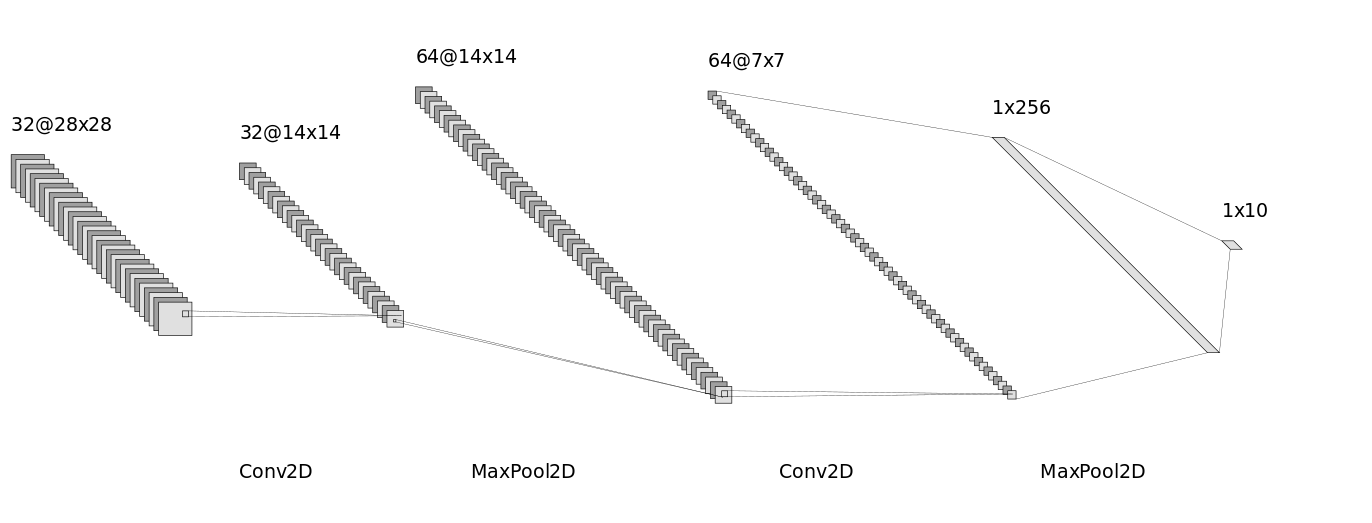

> <div class="alert alert-block alert-info">
<b>The above figure shows the best parameter combination I found after experimenting with a few variations. One thing to keep in mind when experiementing with CNN's is that increasing filters throughout the layers tends to be best.</b>
</div>

### 3.1 Building network

In [27]:
def build_model():
    inp = keras.Input(shape=(28,28,1))
    x = keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),padding='SAME', 
                              activation='relu')(inp)
    x = keras.layers.MaxPool2D(pool_size=(2,2))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='SAME', activation='relu')(x)
    x = keras.layers.MaxPool2D(pool_size=(2,2))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)
    output = keras.layers.Dense(10, activation='softmax')(x)

    model = keras.Model(inputs=inp, outputs=output)

    model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy', f1_metric, recall_metric, precision_metric])
    return model, inp, output

> <div class="alert alert-block alert-info">
    <b>The model is built and compiled using categorical crossentropy and adam optimizer.</b>
</div>

In [28]:
model, inp, out = build_model()
model.summary()

2023-02-20 10:52:40.615782: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-20 10:52:40.615927: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-20 10:52:40.618262: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pipelines-0): /proc/driver/nvidia/version does not exist
2023-02-20 10:52:40.618809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264 

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.2 Training network

> <div class="alert alert-block alert-info">
    <b>Ok, we've built the network. Now, let's train it.</b>
</div>

In [30]:
batch_size=32

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=batch_size,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=10, 
                                                             min_delta=0.005, restore_best_weights=True),
                              keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 3)])

2023-02-20 10:52:49.667764: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 118540800 exceeds 10% of free system memory.


Epoch 1/40
1182/1182 [==============================] - 105s 87ms/step - loss: 0.4521 - accuracy: 0.8554 - f1_metric: 0.8112 - recall_metric: 0.8242 - precision_metric: 0.7998 - val_loss: 0.1000 - val_accuracy: 0.9688 - val_f1_metric: 0.9566 - val_recall_metric: 0.9647 - val_precision_metric: 0.9487 - lr: 1.0000e-04
Epoch 2/40
1182/1182 [==============================] - 107s 91ms/step - loss: 0.1474 - accuracy: 0.9536 - f1_metric: 0.9383 - recall_metric: 0.9474 - precision_metric: 0.9294 - val_loss: 0.0659 - val_accuracy: 0.9790 - val_f1_metric: 0.9738 - val_recall_metric: 0.9780 - val_precision_metric: 0.9696 - lr: 1.0000e-04
Epoch 3/40
1182/1182 [==============================] - 101s 85ms/step - loss: 0.1009 - accuracy: 0.9688 - f1_metric: 0.9587 - recall_metric: 0.9651 - precision_metric: 0.9526 - val_loss: 0.0675 - val_accuracy: 0.9812 - val_f1_metric: 0.9766 - val_recall_metric: 0.9801 - val_precision_metric: 0.9731 - lr: 1.0000e-04
Epoch 4/40
1182/1182 [========================

In [33]:
tf.saved_model.save(model, "./model/saved_model")

INFO:tensorflow:Assets written to: ./model/saved_model/assets


INFO:tensorflow:Assets written to: ./model/saved_model/assets


In [1]:
!pip install tf2onnx
!python -m tf2onnx.convert --saved-model ./model/saved_model --output ./model/model-bis.onnx --opset 13

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 kB 6.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 79.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 128.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
2023-02-20 12:21:49.469443: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CP

In [2]:
import boto3
import os

key_id = os.environ.get("AWS_ACCESS_KEY_ID")
secret_key = os.environ.get("AWS_SECRET_ACCESS_KEY")
bucket_name = os.environ.get("AWS_S3_BUCKET")
s3_endpoint = os.environ.get("AWS_S3_ENDPOINT")

s3_client = boto3.client("s3", aws_access_key_id=key_id, aws_secret_access_key=secret_key, endpoint_url=s3_endpoint)

In [4]:
s3_client.upload_file("./model/model-bis.onnx", bucket_name, "model-bis.onnx")

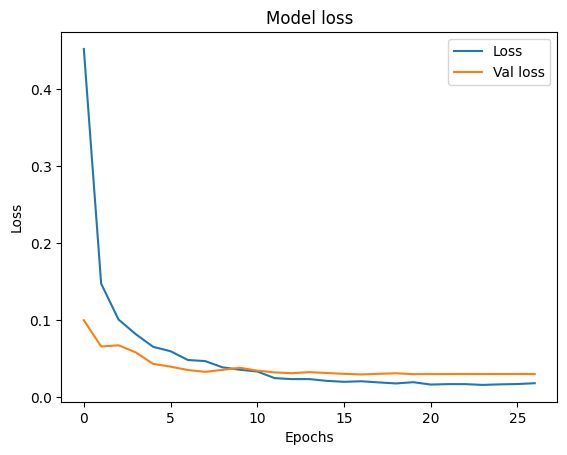

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Val loss'])

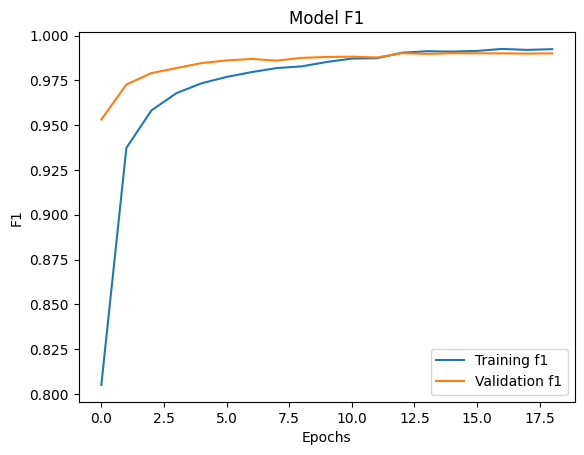

In [369]:
plt.plot(history.history['f1_metric'])
plt.plot(history.history['val_f1_metric'])
plt.title('Model F1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(['Training f1','Validation f1'])

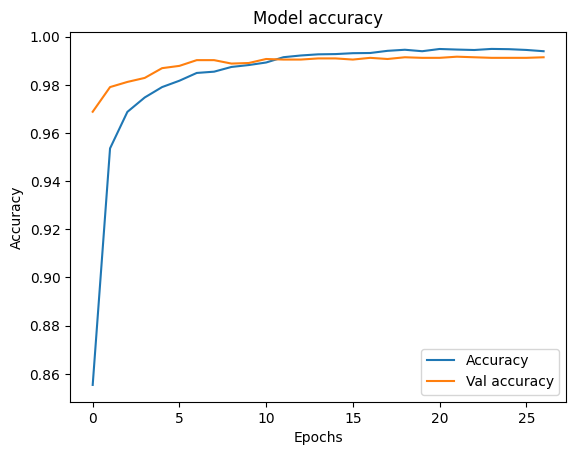

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Val accuracy'])

> <div class="alert alert-block alert-info">
    <b>Looking at the loss plots, the network is converging well.</b>
</div>

### 3.3 Validation results

In [371]:
from sklearn.metrics import confusion_matrix

In [372]:
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_pred

132/132 [==============================] - 0s 2ms/step


array([6, 2, 7, ..., 3, 1, 5], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

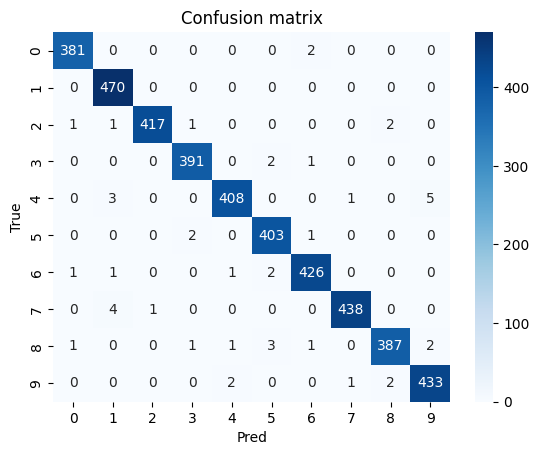

In [373]:
cm = confusion_matrix(np.argmax(y_val,axis=1), y_val_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Pred')
plt.ylabel('True')

> <div class="alert alert-block alert-info">
<b>Confusion matrix looks really good as well, lots of predictions along the diagonal which is what we want to see.</b>
</div>

In [374]:
y_val_true = np.argmax(y_val,axis=1)
y_val_true

array([6, 2, 7, ..., 3, 1, 5], dtype=int64)

In [375]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val_true, y_val_pred)

0.9890476190476191

> <div class="alert alert-block alert-info">
<b>Ok, not bad for our first model! The model has done a pretty good job at classifying each class and is obtaining a high accuracy score. Now we should take a look at the examples the model is misclassifying.</b>
</div>

In [376]:
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred,axis=1)
test_results = pd.DataFrame({'ImageID': np.arange(1,28001,1), 'Label': y_test_pred})

875/875 [==============================] - 1s 2ms/step


In [456]:
model.save(file_dir+r'\models\model_1')

INFO:tensorflow:Assets written to: C:\Users\Thomas\OneDrive\Desktop\mnist\models\model_1\assets


INFO:tensorflow:Assets written to: C:\Users\Thomas\OneDrive\Desktop\mnist\models\model_1\assets


### 3.4 Review of incorrectly classified examples

> <div class="alert alert-block alert-info">
<b>The class with the most confusions is between class 4 and 9 (this may change in your local version), let's take a look at the incorrectly predicted examples.</b>
</div>

In [377]:
cm_index = cm
np.fill_diagonal(cm_index,0)
cm_index = np.where(cm_index==cm_index.max())
if len(cm_index)>1:
    cm_index = [cm_index[0][0],cm_index[1][0]]
cm_index

[4, 9]

In [378]:
cm_index

[4, 9]

In [379]:
nine_incorrect_examples = X_val[(y_val_true==cm_index[0]) & (y_val_pred==cm_index[1])]
nine_incorrect_examples = nine_incorrect_examples.reshape(-1,28,28)

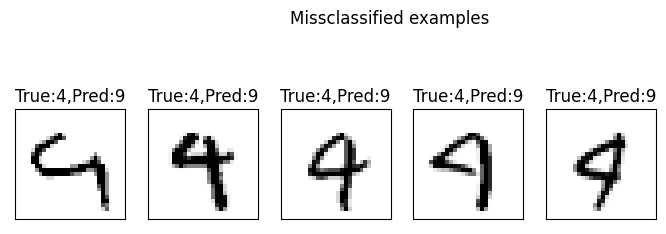

In [380]:
filters_layer_1 = model.layers[1].get_weights()[0]
filters_layer_1 = np.squeeze(filters_layer_1).reshape(32,5,5)

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Missclassified examples')
w = 10
h = 10
columns = 6
rows = 6
for i in range(columns*rows +1):
    if i==nine_incorrect_examples.shape[0]:
        break
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(nine_incorrect_examples[i], cmap='Greys')
    plt.title('True:{},Pred:{}'.format(cm_index[0],cm_index[1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

> <div class="alert alert-block alert-info">
<b>Looking at the missclassifications, its understandable why the model was unable classify these examples correctly. Some of the examples are quite ambiguous, even a human labeller would probably be unable to clearly label them with good confidence. However, it does seem that there is room for improvement for some of the examples. With the use of data augmentation and hyper-parameter tuning, we should be able to further improve performance.</b>
</div>

### 3.5 Visualizing filters and feature-maps

> <div class="alert alert-block alert-info">
<b>Before we try these additional techniques, let's take a quick look at the learnt convolutional filters and feature maps, which should give us some insight on how the network is learning.</b></div>

In [381]:
model.layers

In [382]:
model.layers[1].get_weights()[0].shape

(5, 5, 1, 32)

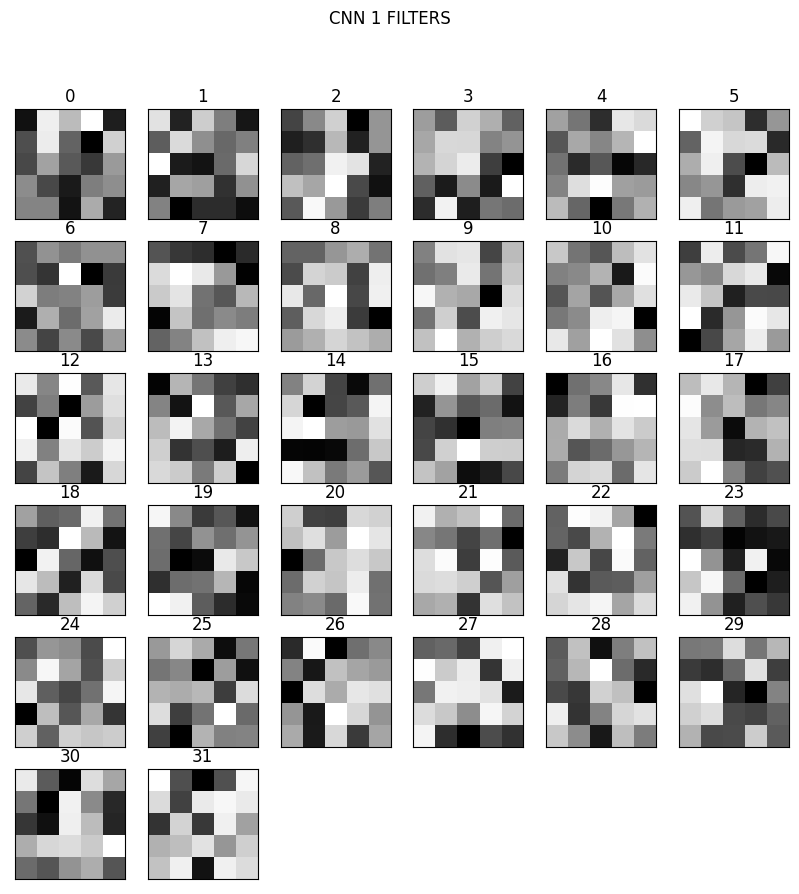

In [383]:
filters_layer_1 = model.layers[1].get_weights()[0]
filters_layer_1 = np.squeeze(filters_layer_1).reshape(32,5,5)

fig = plt.figure(figsize=(10, 10))
fig.suptitle('CNN 1 FILTERS')
w = 10
h = 10
columns = 6
rows = 6
for i in range(columns*rows +1):
    if i==filters_layer_1.shape[0]:
        break
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(filters_layer_1[i], cmap='Greys')
    plt.title(i)
    plt.xticks([])
    plt.yticks([])
plt.show()

> <div class="alert alert-block alert-info">
<b>Shown above is the visualizatins of the 32 learnt filters in the first convolutional layer. The filters are what convolve over the images to produce the activation maps, also known as feature-maps.</b>
    <br></br>
<b>The feature-maps capture key features and patterns from the input (i.e the input image or feature maps from previous ConvBlocks).</b>
    <br></br> 
<b>The reason for visualizing feature maps is to understand what features of the input are detected and preserved in the feature maps. Lets now explore some of the feature maps to see what the model is capturing.</b>
</div>

In [384]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

1 conv2d_14 (None, 28, 28, 32)

5 conv2d_15 (None, 14, 14, 64)


In [385]:


successive_outputs = [layer.output for layer in model.layers[1:]]
fm_model = keras.Model(inputs=model.input, outputs=successive_outputs)

successive_outputs


[<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_14')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d_14')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'batch_normalization_14')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'dropout_21')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_15')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_15')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'batch_normalization_15')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'dropout_22')>,
 <KerasTensor: shape=(None, 3136) dtype=float32 (created by layer 'flatten_7')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_14')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dropout_23')>,
 <KerasTensor: shape=(None,

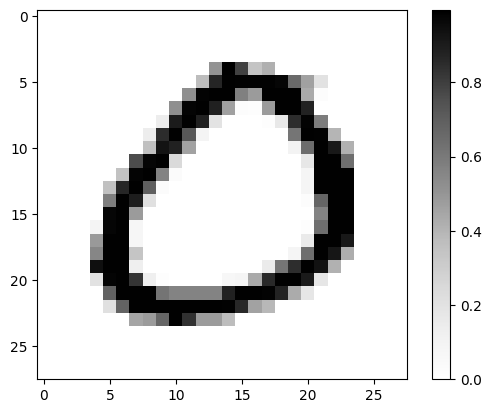

1/1 [==============================] - 0s 81ms/step


12

In [386]:
test_example = X_train[[9]]
plt.imshow(test_example[0], cmap='Greys')
plt.colorbar()
plt.show()
successive_feature_maps = fm_model.predict(test_example)
len(successive_feature_maps) # 12 for 12 layers

> <div class="alert alert-block alert-info">
<b>Now that we have a test example, lets run it through the network to obtain and visualize the feature-maps.</b></div>

(1, 28, 28, 32)

input_8

(1, 14, 14, 32)

conv2d_14

(1, 14, 14, 32)

max_pooling2d_14

(1, 14, 14, 32)

batch_normalization_14

(1, 14, 14, 64)

dropout_21

(1, 7, 7, 64)

conv2d_15

(1, 7, 7, 64)

max_pooling2d_15

(1, 7, 7, 64)

batch_normalization_15

(1, 3136)

dropout_22

(1, 256)

flatten_7

(1, 256)

dense_14

(1, 10)

dropout_23


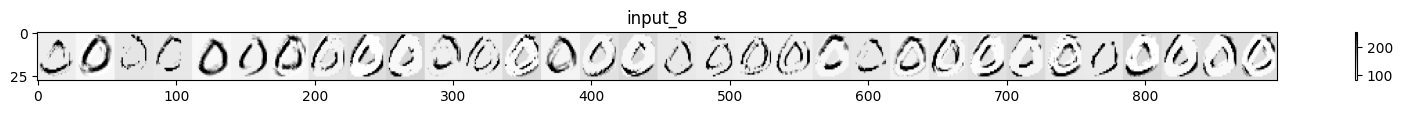

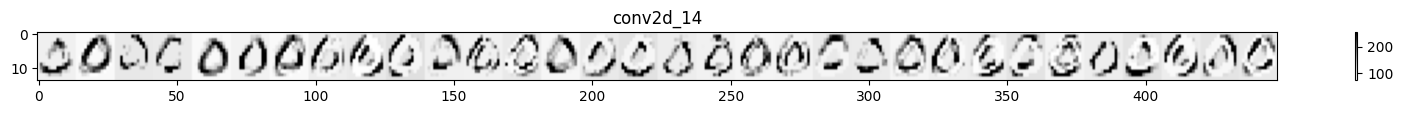

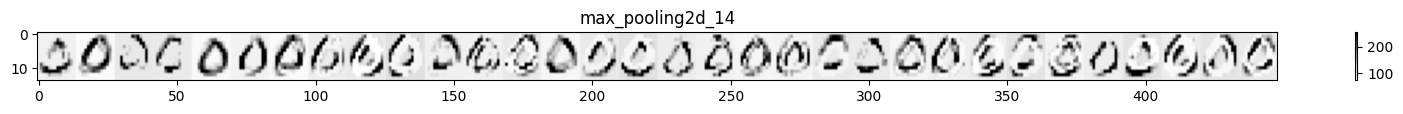

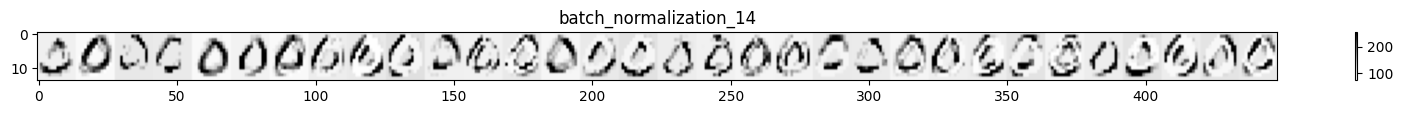

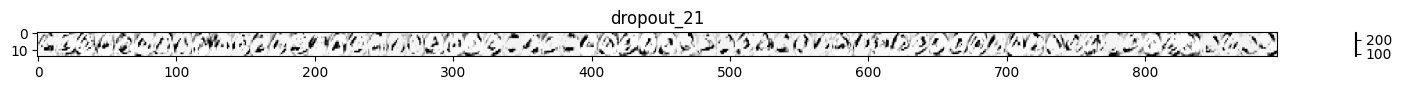

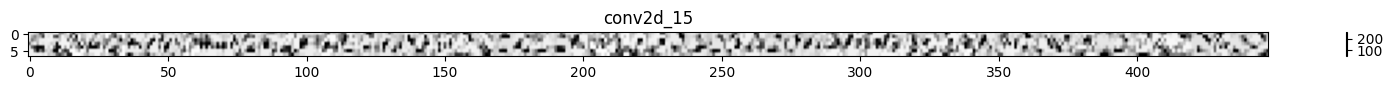

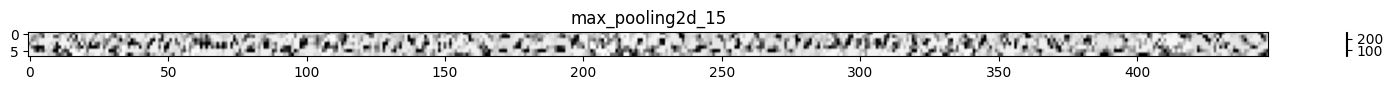

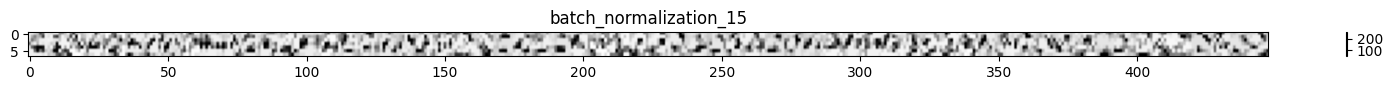

In [387]:
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    print(layer_name)
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            # Tile each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            
        # Display the grid
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title(layer_name) 
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='Greys' )
        plt.colorbar()
        
plt.show()

> <div class="alert alert-block alert-info">
<b>Cool! We now have the feature map outputs at each layer. We can see from the outputted feature maps that some of the filters focused more on edges and outlines, while others on the overall shape and blobs.</b></div>

> <div class="alert alert-block alert-info">
    <b>For a more in-depth guides into this, check out these links:</b>
<br></br>
<b>https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks</b>
<br></br>
<b>https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c</b></div>

# 4. Data augmentation

> <div class="alert alert-block alert-info">
    <b>Lets now look at a technique called Data augmentation.</b>
<br></br>
<b>Data augmentation allows us to generate new images (artificial data) by slightly modifying the images in the training set by applying different transformations. In this notebook, we will use shifting, rotating and zooming transformations to modify the data and generate new examples.</b>
<br></br>
<b>One of the benefits of data augmentation is it acts as a regularizer and helps to reduce overfitting when training a model. This is because with more artificially generated images, the model is unable to overfit to specific examples and is forced to generalize, thus the model becomes more robust. This generally leads to a better overall performance.</b></div>

### 4.1 Creating an ImageDataGenerator

In [407]:
from keras.preprocessing.image import ImageDataGenerator

In [408]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        zoom_range = 0.10,  
)

> <div class="alert alert-block alert-info">
<b>ImageDataGenerator is a brilliant class in keras, which allows us to augment images in real-time while our model is training. This means we can pass it as input to the model, and new augmented images will be generated in batches on the go.</b></div>

> <div class="alert alert-block alert-info">
<b>Here is a good explanation about the class in more depth: https://deepchecks.com/question/what-is-the-output-of-imagedatagenerator/</b></div>

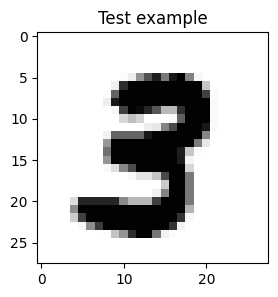

In [409]:
temp_example_X = X_train[1].reshape(-1,28,28,1)
temp_example_y = y_train[1].reshape(-1,10)
plt.figure(figsize=(3,3))
plt.title('Test example')
plt.imshow(temp_example_X.squeeze(), cmap='Greys')

> <div class="alert alert-block alert-info">
<b>Lets select a test example for demonstration, and generate some new images using data augmentation.</b>
</div>

### 4.2 Augmented images visualized

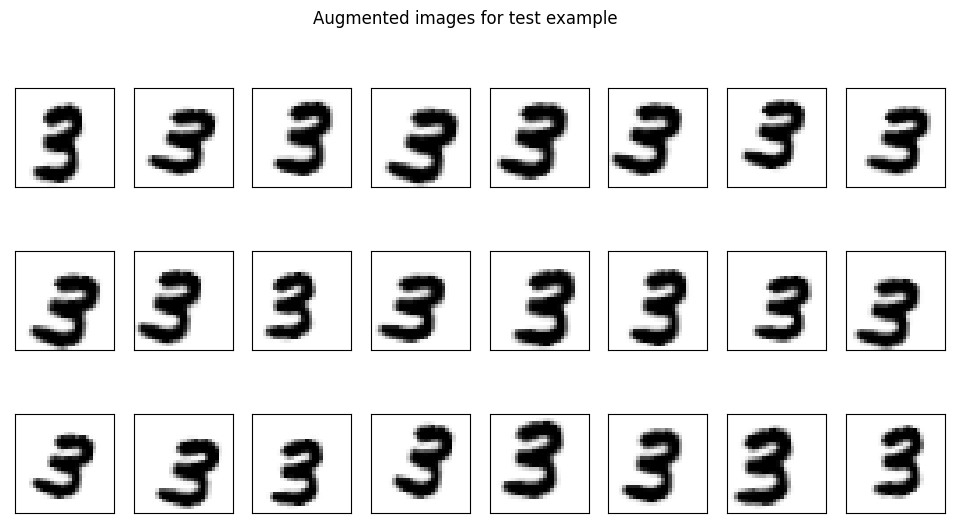

In [410]:

fig, axes = plt.subplots(3,8, figsize=(12,6))
fig.suptitle('Augmented images for test example')
for i in range(3):
    for j in range(8):
        augmented_example_X, augmented_example_y = datagen.flow(temp_example_X, temp_example_y, batch_size=1).next()
        axes[i,j].imshow(augmented_example_X.squeeze(), cmap='Greys')
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

> <div class="alert alert-block alert-info">
<b>Here are the artificial images generated. You can see how much variation can be created by slightly modifying just one image.</b>
</div>

### 4.3 Training network on augmented data

> <div class="alert alert-block alert-info">
<b>Now we should try training the model again, except this time we will train the model using augmented data.</b>
</div>

In [423]:
model2, _, _ = build_model()

In [424]:
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

In [425]:
steps_per_epoch = train_generator.n // train_generator.batch_size
steps_per_epoch

1181

In [426]:
print(train_generator.n, train_generator.batch_size)

37800 32


In [427]:
steps_per_epoch

1181

In [428]:
history2 = model2.fit(train_generator, validation_data=(X_val, y_val), epochs=40, steps_per_epoch=steps_per_epoch,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=10, 
                                                            min_delta=0.005, restore_best_weights=True),
                              keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 3)])

Epoch 1/40

1181/1181 [==============================] - 12s 9ms/step - loss: 0.7741 - accuracy: 0.7475 - f1_metric: 0.6677 - recall_metric: 0.6780 - precision_metric: 0.6602 - val_loss: 0.1071 - val_accuracy: 0.9671 - val_f1_metric: 0.9549 - val_recall_metric: 0.9628 - val_precision_metric: 0.9473 - lr: 1.0000e-04

Epoch 2/40

1181/1181 [==============================] - 11s 9ms/step - loss: 0.2754 - accuracy: 0.9136 - f1_metric: 0.8834 - recall_metric: 0.8978 - precision_metric: 0.8698 - val_loss: 0.0654 - val_accuracy: 0.9786 - val_f1_metric: 0.9719 - val_recall_metric: 0.9761 - val_precision_metric: 0.9679 - lr: 1.0000e-04

Epoch 3/40

1181/1181 [==============================] - 10s 9ms/step - loss: 0.1891 - accuracy: 0.9415 - f1_metric: 0.9209 - recall_metric: 0.9320 - precision_metric: 0.9103 - val_loss: 0.0450 - val_accuracy: 0.9845 - val_f1_metric: 0.9812 - val_recall_metric: 0.9844 - val_precision_metric: 0.9781 - lr: 1.0000e-04

Epoch 4/40

1181/1181 [=======================

> <div class="alert alert-block alert-info">
    <b>Training the model on augmented data..</b>
</div>

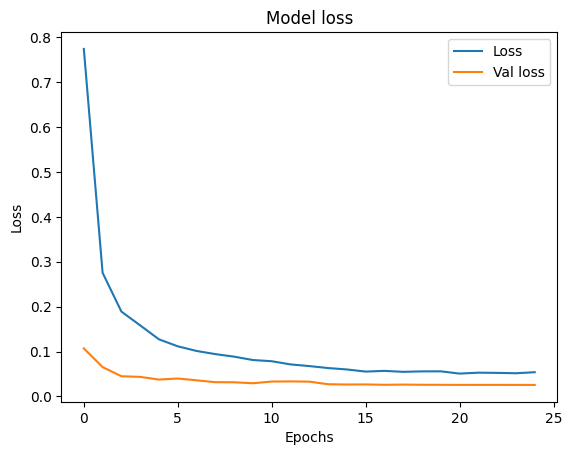

In [437]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Val loss'])

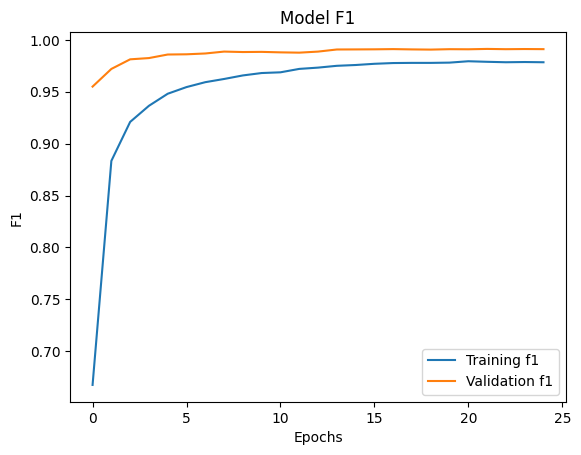

In [438]:
plt.plot(history2.history['f1_metric'])
plt.plot(history2.history['val_f1_metric'])
plt.title('Model F1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.legend(['Training f1','Validation f1'])

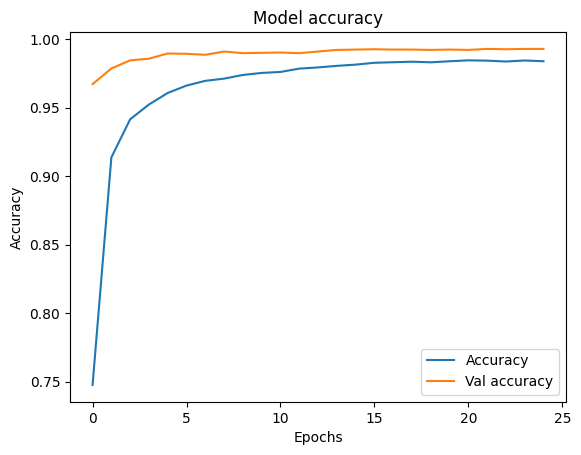

In [439]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Val accuracy'])

### 4.4 Validation results on augmented data

In [440]:
y_val_pred = np.argmax(model2.predict(X_val), axis=1)
y_val_pred

132/132 [==============================] - 0s 3ms/step


array([6, 2, 7, ..., 3, 1, 5], dtype=int64)

Text(50.722222222222214, 0.5, 'True')

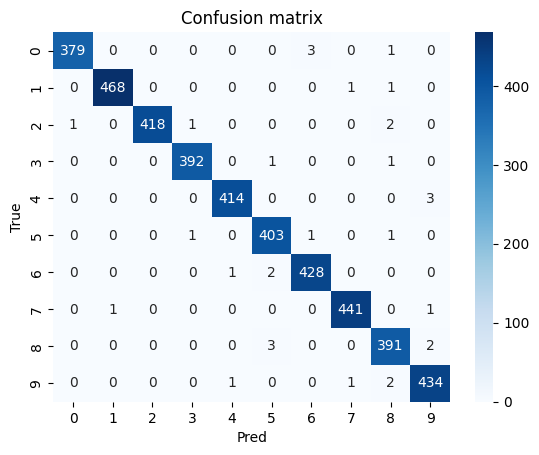

In [441]:
sns.heatmap(confusion_matrix(np.argmax(y_val,axis=1), y_val_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Pred')
plt.ylabel('True')

In [442]:
accuracy_score(y_val_true, y_val_pred)

0.9923809523809524

> <div class="alert alert-block alert-info">
<b>We can see using data augmentation has improved our accuracy score by over 0.2%, which is quite a lot considering we are in the top 1% of accuracy score.</b>
</div>

In [443]:
y_test_pred = model2.predict(X_test)
y_test_pred = np.argmax(y_test_pred,axis=1)
test_results = pd.DataFrame({'ImageID': np.arange(1,28001,1), 'Label': y_test_pred})

875/875 [==============================] - 2s 2ms/step


In [457]:
model2.save(file_dir+r'\models\model_2')

INFO:tensorflow:Assets written to: C:\Users\Thomas\OneDrive\Desktop\mnist\models\model_2\assets


INFO:tensorflow:Assets written to: C:\Users\Thomas\OneDrive\Desktop\mnist\models\model_2\assets


# 5. Hyper-parameter tuning

> <div class="alert alert-block alert-info">
<b>Now that we've implemented a data augmentation technique, we need find the optimal hyper-parameter settings to maximize model performance. We will use the keras-tuner library, which is a hyperparameter optimization framework containing multiple tuning algorithms including RandomSearch, HyperBand and BayesianOptimization.</b>
</div>

### 5.1 Building hyper-parameter model

In [122]:
import keras_tuner as kt

In [123]:
def build_model_hp(hp):
    inp = keras.layers.Input(shape=[28,28,1])
    
    dropout = hp.Choice('conv_block_dropout', [0.125,0.25,0.375,0.5])
    conv_kernel_size = hp.Choice('conv_kernel_size', [5]) # Kernel size 5 is optimal after mutliple testing experiments
    
    n_layers = hp.Choice('n_conv_blocks', [2,3,4])

    filter_choice = hp.Choice('filter_combination_choice', [0,1,2,3])
    
    filter_combinations_2 = [[16,32],[32,64],[64,128],[128,256]]
    filter_combinations_3 = [[16,32,48],[16,32,64],[32,64,128],[64,128,256]]
    filter_combinations_4 = [[16,16,32,32],[32,32,64,64],[64,64,128,128],[128,128,256,256]]

    if n_layers==2:
        filter_settings = filter_combinations_2[filter_choice]
    elif n_layers==3:
        filter_settings = filter_combinations_3[filter_choice]
    elif n_layers==4:
        filter_settings = filter_combinations_4[filter_choice]
        
    for i in range(n_layers):
        if i == 0:
            x = keras.layers.Conv2D(filters=filter_settings[i], 
                            kernel_size=conv_kernel_size,
                            strides=1, padding='SAME', 
                            activation='relu')(inp)
        else:
            x = keras.layers.Conv2D(filters=filter_settings[i], 
                            kernel_size=conv_kernel_size,
                            strides=1, padding='SAME', 
                            activation='relu')(x)

        x = keras.layers.MaxPool2D(pool_size=2)(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Dropout(dropout)(x)
            
    x = keras.layers.Flatten()(x) 
    
    n_fc_layers = hp.Choice('n_fc_layers', [1,2,3])
    
    fc_choice = hp.Choice('fc_units_combination_choice', [0,1])
    
    fc_combinations_1 = [[128],[256]]
    fc_combinations_2 = [[128,64],[256,128]]
    fc_combinations_3 = [[512,256,128],[256,128,64]]
    
    if n_fc_layers==1:
        fc_units = fc_combinations_1[fc_choice]
    elif n_fc_layers==2:
        fc_units = fc_combinations_2[fc_choice]
    elif n_fc_layers==3:
        fc_units = fc_combinations_3[fc_choice]
    
    for j in range(n_fc_layers):
        x = keras.layers.Dense(fc_units[j], activation='relu')(x)
        x = keras.layers.Dropout(hp.Choice('fc_dropout', [0.125,0.25,0.5]))(x)
    
    out = keras.layers.Dense(10, activation='softmax')(x)
    
    model = keras.Model(inputs=inp, outputs=out)
    
    model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy', f1_metric, recall_metric, precision_metric])
    
    return model

In [124]:
# tuner = kt.RandomSearch(hypermodel=build_model_hp, objective='val_loss', max_trials=200, 
#                         overwrite=False, project_name='random_search')

In [125]:
tuner = kt.Hyperband(hypermodel=build_model_hp, objective='val_loss', max_epochs=50, executions_per_trial=2,
                        overwrite=False, project_name='hyperband_results')

INFO:tensorflow:Reloading Oracle from existing project .\hyperband_results\oracle.json

INFO:tensorflow:Reloading Tuner from .\hyperband_results\tuner0.json


> <div class="alert alert-block alert-info">
<b>I tested both RandomSearch and HyperBand, and found HyperBand to be much more successful so we will use that.</b>
</div>

In [126]:
tuner.search_space_summary()

Search space summary

Default search space size: 7

conv_block_dropout (Choice)

{'default': 0.125, 'conditions': [], 'values': [0.125, 0.25, 0.375, 0.5], 'ordered': True}

conv_kernel_size (Choice)

{'default': 5, 'conditions': [], 'values': [5], 'ordered': True}

n_conv_blocks (Choice)

{'default': 2, 'conditions': [], 'values': [2, 3, 4], 'ordered': True}

filter_combination_choice (Choice)

{'default': 0, 'conditions': [], 'values': [0, 1, 2, 3], 'ordered': True}

n_fc_layers (Choice)

{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}

fc_units_combination_choice (Choice)

{'default': 0, 'conditions': [], 'values': [0, 1], 'ordered': True}

fc_dropout (Choice)

{'default': 0.125, 'conditions': [], 'values': [0.125, 0.25, 0.5], 'ordered': True}


### 5.2 Hyper-parameter search (using HyperBand)

> <div class="alert alert-block alert-info">
<b>The hyperband tuning algorithm is an extension of the Successive Halving Algorithm(SHA) for adaptive resource allocation with early stopping. </b>
<br></br>
<b>Here is the original paper:* https://jmlr.org/papers/volume18/16-558/16-558.pdf</b>
<br></br>
<b>Essentially, what this means is at the start of tuning, all parameter sets get equal opportunity (uniform allocation of resources). The tuning algorithm only uses limited resources at the start for efficiency (i.e. 2-3 epochs). After the first stage, the top-half of best performing hyper-parameter sets are then progressed onto the next stage, with more resources allocated them (i.e. 10 epochs). The process is continued until the optimal configuration is found. Pretty smart huh!</b>
</div>

> <div class="alert alert-block alert-info">
<b>We will now start the HyperBand tuning search, this might take a while...</b>
</div>

#### *We will now start the HyperBand tuning search, this might take a while...*

In [133]:
tuner.search(train_generator, validation_data=(X_val, y_val), epochs=30, steps_per_epoch=steps_per_epoch,
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=10,
                                                      min_delta=0.005, restore_best_weights=True),
                       keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 3)])


Trial 90 Complete [00h 10m 13s]

val_loss: 0.01791099552065134



Best val_loss So Far: 0.01662298757582903

Total elapsed time: 05h 29m 10s

INFO:tensorflow:Oracle triggered exit


> <div class="alert alert-block alert-info">
    <b>After almost 5.5 hours, the search is done! Let's check the results.</b>
</div>

### 5.3 Hyper-parameter results

In [234]:
top_model = tuner.get_best_models(1)[0]
top_model_hps = tuner.get_best_hyperparameters(1)[0]
print(top_model_hps.values)
top_model.summary()

{'conv_block_dropout': 0.375, 'conv_kernel_size': 5, 'n_conv_blocks': 4, 'filter_combination_choice': 2, 'n_fc_layers': 1, 'fc_units_combination_choice': 1, 'fc_dropout': 0.25, 'tuner/epochs': 50, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}

Model: "model"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         

                                                                 

 conv2d (Conv2D)             (None, 28, 28, 64)        1664      

                                                                 

 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         

 )                                                               

                                                                 

 batch_normalization (BatchN  (None, 14, 14, 64)       256       

 ormalization)                                     

> <div class="alert alert-block alert-info">
<b>Above shows the hyper-parameters and model architecture of the best performing model from hyper-parameter tuning.</b>
<br></br>
<b>Lets view the validation accuracy for the best model.</b>
</div>

In [235]:
y_val_true = np.argmax(y_val,axis=1)
y_val_pred = np.argmax(top_model.predict(X_val), axis=1)
accuracy_score(y_val_true, y_val_pred)


132/132 [==============================] - 1s 4ms/step


0.9973809523809524

> <div class="alert alert-block alert-info">
<b>Wow, the accuracy score of our top model is significantly better than our previous model. This shows the importance of hyper-parameter tuning, and was definitely worth the time spent tuning.</b>
</div>

In [236]:
tuner.results_summary(5)

Results summary

Results in .\hyperband_results

Showing 5 best trials


Trial summary

Hyperparameters:

conv_block_dropout: 0.375

conv_kernel_size: 5

n_conv_blocks: 4

filter_combination_choice: 2

n_fc_layers: 1

fc_units_combination_choice: 1

fc_dropout: 0.25

tuner/epochs: 50

tuner/initial_epoch: 0

tuner/bracket: 0

tuner/round: 0

Score: 0.01662298757582903

Trial summary

Hyperparameters:

conv_block_dropout: 0.25

conv_kernel_size: 5

n_conv_blocks: 4

filter_combination_choice: 1

n_fc_layers: 1

fc_units_combination_choice: 1

fc_dropout: 0.125

tuner/epochs: 50

tuner/initial_epoch: 17

tuner/bracket: 3

tuner/round: 3

tuner/trial_id: 0047

Score: 0.01683750282973051

Trial summary

Hyperparameters:

conv_block_dropout: 0.5

conv_kernel_size: 5

n_conv_blocks: 4

filter_combination_choice: 3

n_fc_layers: 1

fc_units_combination_choice: 1

fc_dropout: 0.125

tuner/epochs: 50

tuner/initial_epoch: 17

tuner/bracket: 1

tuner/round: 1

tuner/trial_id: 0078

Score: 0.0178

> <div class="alert alert-block alert-info">
<b>Here are some more models for comparison, showing the network configurations of the top 5 models (in order of best performing).</b>
</div>

# 6. Ensembling

> <div class="alert alert-block alert-info">
    <b>Lets move on to our last technique called Ensembling.</b>
<br></br>
<b>Ensembling is a technique which "ensembles" multiple models together to obtain a better predictive performance. The concept is that three models used together should be better at making prediction than one model on it's own, right? Let's do some testing and see..</b>
</div>

### 6.1 Ensembling top models from hyper-parameter tuning

In [237]:
top_2_models = tuner.get_best_models(2)
top_2_models

In [238]:
top_3_models = tuner.get_best_models(3)
top_3_models

In [239]:
top_5_models = tuner.get_best_models(5)
top_5_models

In [240]:
top_10_models = tuner.get_best_models(10)
top_10_models

> <div class="alert alert-block alert-info">
<b>We have now grouped top models into 4 groups; top 2, top 3, top 5 and top 10. We now need to find which group has highest validation accuracy.</b>
</div>

### 6.2 Voting classifier function and validation results

In [241]:
def ensemble_models(models, data):
    results = np.zeros((data.shape[0],10))
    for i in range(len(models)):
        results = results + models[i].predict(data)
    
    results = np.argmax(results, axis=1)
    results = pd.Series(results, name='Label')
    return results

> <div class="alert alert-block alert-info">
<b>I have created a voting classifier function for final ensembling prediction. For each sample in the data, each model will vote for a digit. The digit with the most votes at the end is chosen as the final prediction for that sample.</b>
</div>

In [242]:
results = ensemble_models(top_2_models, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 1s 3ms/step

132/132 [==============================] - 0s 2ms/step

Accuracy 0.9971428571428571


In [243]:
results = ensemble_models(top_3_models, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 3ms/step

Accuracy 0.9976190476190476


In [244]:
results = ensemble_models(top_5_models, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 3ms/step

132/132 [==============================] - 0s 2ms/step

Accuracy 0.9976190476190476


> <div class="alert alert-block alert-info">
<b>After checking the accuracy score of the differents groups on the validation data, we can see top 3 and top 5 groups have the highest score. We will choose the top 3 ensembled model for computational efficiency.</b>
</div>

In [245]:
results = ensemble_models(top_3_models, X_test)
results = pd.concat([pd.Series(np.arange(1,X_test.shape[0]+1,1),name = "ImageId"),results],axis = 1)
results.to_csv(r'test_results.csv', index=False)

875/875 [==============================] - 2s 3ms/step

875/875 [==============================] - 2s 2ms/step

875/875 [==============================] - 2s 2ms/step


> <div class="alert alert-block alert-info">
    <b>We will compute the accuracy score for the top 3 ensembled models for comparison later.</b>
</div>

### 6.3 Ensembling on best model

> <div class="alert alert-block alert-info">
    <b>Let's try another ensembling idea.</b>
<br></br>
<b>Instead of modelling the top models from our tuning search, where the models have different settings. Let try ensembling using just our top model, by training our best model multiple times.</b>
</div>

> <div class="alert alert-block alert-info">
    <b>Here is our new idea:</b>
<b><ul>
    <li>Train our best model multiple times.</li>
    <li>Each model will have a unique training and validation split, to ensure all data is trained on.</li>
</ul></b></div>

In [ ]:
# best network configuration settings
{'conv_block_dropout': 0.375, 'conv_kernel_size': 5, 'n_conv_blocks': 4,
 'filter_combination_choice': 2, 'n_fc_layers': 1, 'fc_units_combination_choice': 1, 
 'fc_dropout': 0.25, 

In [156]:
def build_best_model():
    inp = keras.layers.Input(shape=[28,28,1])
    
    conv_dropout = 0.375
    
    conv_kernel_size = 5
    
    n_layers = 4

    filter_settings = [64,64,128,128]
        
    for i in range(n_layers):
        if i == 0:
            x = keras.layers.Conv2D(filters=filter_settings[i], 
                            kernel_size=conv_kernel_size,
                            strides=1, padding='SAME', 
                            activation='relu')(inp)
        else:
            x = keras.layers.Conv2D(filters=filter_settings[i], 
                            kernel_size=conv_kernel_size,
                            strides=1, padding='SAME', 
                            activation='relu')(x)

        x = keras.layers.MaxPool2D(pool_size=2)(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Dropout(conv_dropout)(x)
            
    x = keras.layers.Flatten()(x) 
    
    n_fc_layers = 1
        
    fc_units = [256]

    fc_dropout = 0.25
    
    for j in range(n_fc_layers):
        x = keras.layers.Dense(fc_units[j], activation='relu')(x)
        x = keras.layers.Dropout(fc_dropout)(x)
    
    out = keras.layers.Dense(10, activation='softmax')(x)
    
    model = keras.Model(inputs=inp, outputs=out)
    
    model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy', f1_metric, recall_metric, precision_metric])
    
    return model

> <div class="alert alert-block alert-info">
    <b>Our best model is now built.</b>
</div>

In [174]:
n_models = 10
models = [0]*10
for i in range(n_models):
    models[i] = build_best_model()

> <div class="alert alert-block alert-info">
    <b>We have created 10 models of our best model. Lets now train each model.</b>
</div>

In [188]:

historys = [0]*n_models
for i in range(n_models):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1) #Random data each time
    
    X_train = features_pipeline.fit_transform(X_train)
    y_train = target_pipeline.fit_transform(y_train.values.reshape(-1,1))
    y_train = y_train.toarray()
    
    X_val = features_pipeline.fit_transform(X_val)
    y_val = target_pipeline.fit_transform(y_val.values.reshape(-1, 1))
    y_val = y_val.toarray()
    
    train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
    
    historys[i] = models[i].fit(train_generator, validation_data=(X_val, y_val), epochs=40, steps_per_epoch=steps_per_epoch,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=10, 
                                                            min_delta=0.005, restore_best_weights=True),
                              keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 3)], verbose=0)
    
    models[i].save(file_dir+r'\top_model_ensemble\model_{}'.format(str(i)))
    
    idx = np.argmin(historys[i].history['val_loss'])
    print('Model: {} || Training loss: {}, Validation loss: {}, Training accuracy: {}, Validation accuracy: {}'.format(
    i+1, round(historys[i].history['loss'][idx], 4), round(historys[i].history['val_loss'][idx], 4), 
        round(historys[i].history['accuracy'][idx], 4), round(historys[i].history['val_accuracy'][idx], 4))
         )
    

Model: 1 || Training loss: 0.0362, Validation loss: 0.0251, Training accuracy: 0.989, Validation accuracy: 0.9938

Model: 2 || Training loss: 0.0309, Validation loss: 0.009, Training accuracy: 0.9911, Validation accuracy: 0.9971

Model: 3 || Training loss: 0.0443, Validation loss: 0.0176, Training accuracy: 0.9864, Validation accuracy: 0.9955

Model: 4 || Training loss: 0.0337, Validation loss: 0.0177, Training accuracy: 0.9902, Validation accuracy: 0.994

Model: 5 || Training loss: 0.0335, Validation loss: 0.0154, Training accuracy: 0.99, Validation accuracy: 0.9957

Model: 6 || Training loss: 0.0314, Validation loss: 0.0169, Training accuracy: 0.9906, Validation accuracy: 0.9962

Model: 7 || Training loss: 0.0417, Validation loss: 0.0169, Training accuracy: 0.988, Validation accuracy: 0.9955

Model: 8 || Training loss: 0.0323, Validation loss: 0.0117, Training accuracy: 0.9907, Validation accuracy: 0.9969

Model: 9 || Training loss: 0.0394, Validation loss: 0.0142, Training accuracy:

> <div class="alert alert-block alert-info">
    <b>Ok, this took some time (~1 hour), but the models are now trained and ready for testing.</b>
</div>

In [171]:
models_val_acc = [0.9938, 0.9971, 0.9955, 0.994, 0.9957, 0.9962, 0.9955, 0.9969, 0.9948, 0.996]
# I could have added  this in the for loop.

In [459]:
# Load models if needed
try:
    models
except:
    n_models = 10
    models = [0]*10
    for i in range(n_models):
        models[i] = keras.models.load_model(file_dir+r'\top_model_ensemble\model_{}'.format(str(i)),
                                           custom_objects={'f1_metric':f1_metric, 'recall_metric':recall_metric,
                                                          'precision_metric':precision_metric})

In [184]:
# models_ordered
models_val_idxs = np.argsort(models_val_acc)[::-1]
models_val_idxs

array([1, 7, 5, 9, 4, 6, 2, 8, 3, 0], dtype=int64)

In [186]:
models_ordered = np.array(models)[models_val_idxs]
models_ordered

array([<keras.engine.functional.Functional object at 0x000001BF38D46670>,
      dtype=object)

> <div class="alert alert-block alert-info">
    <b>Now lets group the models into; best_model, top 2, top 3, top 5 and top 10.</b>
</div>

In [205]:
models_ordered_1 = models_ordered[0:1]
models_ordered_1

array([<keras.engine.functional.Functional object at 0x000001BF38D46670>],
      dtype=object)

In [189]:
models_ordered_2 = models_ordered[0:2]
models_ordered_2

array([<keras.engine.functional.Functional object at 0x000001BF38D46670>,
      dtype=object)

In [190]:
models_ordered_3 = models_ordered[0:3]
models_ordered_3

array([<keras.engine.functional.Functional object at 0x000001BF38D46670>,
      dtype=object)

In [191]:
models_ordered_5 = models_ordered[0:5]
models_ordered_5

array([<keras.engine.functional.Functional object at 0x000001BF38D46670>,
      dtype=object)

In [192]:
models_ordered_10 = models_ordered[0:10]
models_ordered_10

array([<keras.engine.functional.Functional object at 0x000001BF38D46670>,
      dtype=object)

> <div class="alert alert-block alert-info">
    <b>Lets check the scores on validation set for each group.</b>
</div>

In [206]:
y_val_true = np.argmax(y_val,axis=1)
y_val_true

array([0, 2, 1, ..., 7, 8, 2], dtype=int64)

In [207]:
results = ensemble_models(models_ordered_1, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 1s 4ms/step

Accuracy 0.9980952380952381


In [208]:
results = ensemble_models(models_ordered_2, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 1s 4ms/step

132/132 [==============================] - 0s 2ms/step

Accuracy 0.9988095238095238


In [209]:
results = ensemble_models(models_ordered_3, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 0s 3ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

Accuracy 0.9988095238095238


In [210]:
results = ensemble_models(models_ordered_5, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 1s 4ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

Accuracy 0.9980952380952381


In [211]:
results = ensemble_models(models_ordered_10, X_val)
results = pd.concat([pd.Series(np.arange(1,X_val.shape[0]+1,1),name = "ImageId"),results],axis = 1)
print('Accuracy', accuracy_score(y_val_true, results['Label'].values))

132/132 [==============================] - 1s 4ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

132/132 [==============================] - 0s 2ms/step

Accuracy 0.9980952380952381


> <div class="alert alert-block alert-info">
<b>Looking at the results for this particular case, we can see that using just the best model alone out of the 10 trained, obtains the same performance as using all 10 in an ensembled model. Therefore we should use just the best model on it's own. Though, it must be noted that the accuracies of the ensembled method in this case are still better than the previous ensembling method.</b>
<br></br>  
<b>The good thing is it wasn't a waste of time, as now that we've trained the best model multiple times we have found the one with the best convergence. We are seeing great performance on the validation set! Now, the real test will be evaluating the model on the test set.</b>
<br></br>  
<b>So.. let's submit the results and review the performance in the conclusion section.</b>
</div>

In [212]:
results = ensemble_models(models_ordered_1, X_test)
results = pd.concat([pd.Series(np.arange(1,X_test.shape[0]+1,1),name = "ImageId"),results],axis = 1)
results.to_csv(r'test_results.csv', index=False)

875/875 [==============================] - 2s 2ms/step


# 7. Conclusion

### 7.1 Results summary

In [248]:
name_list = ['Model 1', 'Model 2', 'Ensembling top 3 models (different settings)', 'Best model','Ensembling top 3 models (same settings)' ]
results_list = [0.99046,0.99242,0.99496,0.99514,0.99514]
pd.DataFrame({'Model':name_list, 'Test accuracy':results_list}).sort_values(by='Test accuracy', ascending=0)

,Model,Test accuracy
3,Best model,0.99514
4,Ensembling top 3 models (same settings),0.99514
2,Ensembling top 3 models (different settings),0.99496
1,Model 2,0.99242
0,Model 1,0.99046


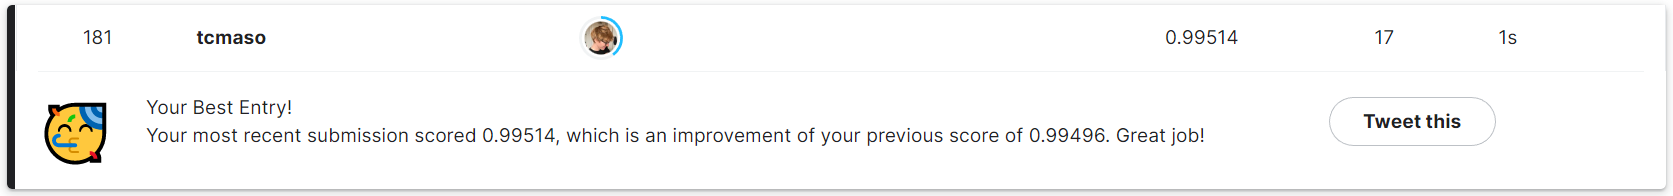

#### *The results show that the CNN architecture using LeNet design has achieved great performance on the MNIST dataset. The first model (Model 1) was a brief exploration into different variations of network settings, which achieved modest performance in comparison to solutions used in other projects. We then tried multiple different techniques through this notebook to improve performance, including; data augmentation (Model 2), hyper-parameter tuning (Best model) and ensembling.*

#### *Both data augmentation and hyper-parameter tuning were significant factors in improving performance, as seen from the results from Model 1 -> Model 2 -> Best model. Ensembling didn't make any difference to performance in this case, though it was still a necessary part of the project as training the best model multiple times allowed us to obtain the best converging model.*

#### *The final best model was able to achieve an accuracy score of 99.5% on the test set, which is a respectable score compared to other solutions [top 15%]. In the future I look forward to exploring different CNN architectures such as AlexNet, ResNet or other algorithms which show promising performance.*

#### *Thank you so much for making it to the end of my notebook. I had a lot of fun making it and I hope you enjoyed. Please leave an upvote if you found it helpful, I would appreciate it a lot, and check out my other work if you want more notebooks like this. All the best.* 😄